## Get the top 150 cities of the world

In [2]:
# AccuWheather API key

API_KEY = "WW2PCtssyTvT77afPMhiLSapuAuaXjNi"

In [3]:
import requests

#request cities:
url = f"http://dataservice.accuweather.com/locations/v1/topcities/150?details=true&apikey={API_KEY}"
results = requests.get(url).json()

In [4]:
import pandas as pd

#create data frame
cities = [(city["EnglishName"], city["Country"]["EnglishName"], city["GeoPosition"]["Latitude"], city["GeoPosition"]["Longitude"], city["Details"]["Population"]) for city in results]
cities_df = pd.DataFrame(cities)
cities_df.columns = ['City', 'Country', 'Latitude', 'Longitude', 'Population']
cities_df.head()

,City,Country,Latitude,Longitude,Population
0,Dhaka,Bangladesh,23.710,90.407,7672032
1,Kinshasa,Democratic Republic of the Congo,-4.316,15.298,7273947
2,Santiago,Chile,-33.446,-70.659,4658687
3,Beijing,China,39.917,116.407,17912405
4,Bogota,Colombia,4.628,-74.077,7033914


## Get suitable categories for historical and cultural tourism

In [5]:
# FourSquare keys:
CLIENT_ID = "5MOABCDFEOHA5VYFDGM3B0RHLYXHLV3KLAFJA5UPVNMY5YYZ"
CLIENT_SECRET = "HGYEQ2WYC2EOTGVD100H3CQKDPDNBM3C2254AEGYSGJU4BLW"
VERSION = "20180604"

In [6]:
# request categories:

url_categories = f"https://api.foursquare.com/v2/venues/categories?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}"
categories_response = requests.get(url).json()
categories_response

[{'Version': 1,
  'Key': '28143',
  'Type': 'City',
  'Rank': 10,
  'LocalizedName': 'Dhaka',
  'EnglishName': 'Dhaka',
  'PrimaryPostalCode': '',
  'Region': {'ID': 'ASI', 'LocalizedName': 'Asia', 'EnglishName': 'Asia'},
  'Country': {'ID': 'BD',
   'LocalizedName': 'Bangladesh',
   'EnglishName': 'Bangladesh'},
  'AdministrativeArea': {'ID': 'C',
   'LocalizedName': 'Dhaka',
   'EnglishName': 'Dhaka',
   'Level': 1,
   'LocalizedType': 'Division',
   'EnglishType': 'Division',
   'CountryID': 'BD'},
  'TimeZone': {'Code': 'BDT',
   'Name': 'Asia/Dhaka',
   'GmtOffset': 6.0,
   'IsDaylightSaving': False,
   'NextOffsetChange': None},
  'GeoPosition': {'Latitude': 23.71,
   'Longitude': 90.407,
   'Elevation': {'Metric': {'Value': 5.0, 'Unit': 'm', 'UnitType': 5},
    'Imperial': {'Value': 16.0, 'Unit': 'ft', 'UnitType': 0}}},
  'IsAlias': False,
  'SupplementalAdminAreas': [],
  'DataSets': ['AirQualityCurrentConditions', 'AirQualityForecasts'],
  'Details': {'Key': '28143',
   'Stati

The most suitable categories are:
 - Amphitheaters: 56aa371be4b08b9a8d5734db
 - Arcades: 4bf58dd8d48988d1e1931735
 - Art Galleries: 4bf58dd8d48988d1e2931735
 - Exhibits: 56aa371be4b08b9a8d573532
 - Concert Halls: 5032792091d4c4b30a586d5c
 - Historic Sites: 4deefb944765f83613cdba6e
 - Memorial Sites: 5642206c498e4bfca532186c
 - Museums: 4bf58dd8d48988d181941735
 - Music Venues: 4bf58dd8d48988d1e5931735
 - Performing Arts Venues: 4bf58dd8d48988d1f2931735
 - Public Art: 507c8c4091d498d9fc8c67a9
 - Tourist Information Centers: 4f4530164b9074f6e4fb00ff

In [7]:
categories = ["56aa371be4b08b9a8d5734db",
              "4bf58dd8d48988d1e1931735",
              "4bf58dd8d48988d1e2931735",
              "56aa371be4b08b9a8d573532",
              "5032792091d4c4b30a586d5c",
              "4deefb944765f83613cdba6e",
              "5642206c498e4bfca532186c",
              "4bf58dd8d48988d181941735",
              "4bf58dd8d48988d1e5931735",
              "4bf58dd8d48988d1f2931735",
              "507c8c4091d498d9fc8c67a9",
              "4f4530164b9074f6e4fb00ff"]

## Get venues of suitable categories for each city

In [8]:
import numpy

def request_venues(latitude, longitude):
    url = 'https://api.foursquare.com/v2/venues/explore?sortByPopularity=1&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            3000, 
            10)
    return requests.get(url).json()
    
def get_average_number_of_likes(venues_response):
    likes = []
    for index in range(len(venues_response["response"]["groups"][0]["items"])):
        venue = venues_response["response"]["groups"][0]["items"][index]
        url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(
                venue["venue"]["id"],
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION)
        response = requests.get(url).json()
        likes.append(response["response"]["likes"]["count"])
    
    return numpy.array(likes).mean()

cities_popularity_df = cities_df.copy()
cities_popularity_df["Venues count"] = 0
cities_popularity_df["Average likes count"] = 0

for row_index in range(cities_df.shape[0]):
    ok = False
    while ok == False:
        try:
            city = cities_popularity_df.iloc[row_index, :]
            lat = city["Latitude"]
            lng = city["Longitude"]
            venues_response = request_venues(lat, lng)
            venues_count = venues_response["response"]["totalResults"]
            cities_popularity_df.loc[row_index, "Venues count"] = venues_count

            average_likes_count = get_average_number_of_likes(venues_response)
            cities_popularity_df.loc[row_index, "Average likes count"] = average_likes_count
            ok = True
        except Exception:
            ok = False    
    
cities_popularity_df.head()

,City,Country,Latitude,Longitude,Population,Venues count,Average likes count
0,Dhaka,Bangladesh,23.710,90.407,7672032,28,17.5
1,Kinshasa,Democratic Republic of the Congo,-4.316,15.298,7273947,44,17.4
2,Santiago,Chile,-33.446,-70.659,4658687,222,1146.8
3,Beijing,China,39.917,116.407,17912405,207,300.3
4,Bogota,Colombia,4.628,-74.077,7033914,220,560.3


In [11]:
valuable_columns = ["City", "Country", "Venues count", "Average likes count"]

top_venues_count_df = cities_popularity_df.copy()[valuable_columns]
top_venues_count_df.sort_values("Venues count", ascending=False, inplace = True)
top_venues_count_df.head(10)

,City,Country,Venues count,Average likes count
23,Sydney,Australia,247,933.3
15,Seoul,South Korea,245,591.1
122,Stockholm,Sweden,245,847.7
26,Shanghai,China,244,185.6
24,Melbourne,Australia,244,638.5
56,Paris,France,243,4747.9
90,Osaka-shi,Japan,242,268.7
71,Belgrade,Serbia,241,821.4
120,Lisbon,Portugal,240,1374.6
52,Prague,Czechia,240,2519.4


In [13]:
top_likes_count_df = cities_popularity_df.copy()[valuable_columns]
top_likes_count_df.sort_values("Average likes count", ascending=False, inplace=True)
top_likes_count_df.head(10)

,City,Country,Venues count,Average likes count
36,Istanbul,Turkey,228,10533.4
41,New York,United States,238,7424.8
8,London,United Kingdom,234,5356.0
16,Mexico City,Mexico,233,5203.5
56,Paris,France,243,4747.9
18,Moscow,Russia,183,4623.2
61,Rome,Italy,238,4518.3
89,Barcelona,Spain,234,3760.5
35,Saint Petersburg,Russia,201,3644.4
7,Madrid,Spain,237,3447.6


## Cluster and hilghlight the most interesting clusters

In [62]:
# normalize venues count and likes count by their max value

max_venues_count = cities_popularity_df["Venues count"].max()
max_likes_count = cities_popularity_df["Average likes count"].max()
print(f"venues: {max_venues_count}, max_likes_count: {max_likes_count}")

clustering_df = cities_popularity_df[["Venues count", "Average likes count"]]
clustering_df = clustering_df.div([max_venues_count, max_likes_count], axis="columns")
clustering_df.head()

venues: 247, max_likes_count: 10533.4


,Venues count,Average likes count
0,0.113360,0.001661
1,0.178138,0.001652
2,0.898785,0.108873
3,0.838057,0.028509
4,0.890688,0.053193


In [72]:
from sklearn.cluster import KMeans

kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering_df)

In [70]:
cities_popularity_df.insert(0, 'Cluster', kmeans.labels_)
cities_popularity_df.head()

,Cluster,City,Country,Latitude,Longitude,Population,Venues count,Average likes count
0,1,Dhaka,Bangladesh,23.710,90.407,7672032,28,17.5
1,1,Kinshasa,Democratic Republic of the Congo,-4.316,15.298,7273947,44,17.4
2,0,Santiago,Chile,-33.446,-70.659,4658687,222,1146.8
3,0,Beijing,China,39.917,116.407,17912405,207,300.3
4,0,Bogota,Colombia,4.628,-74.077,7033914,220,560.3


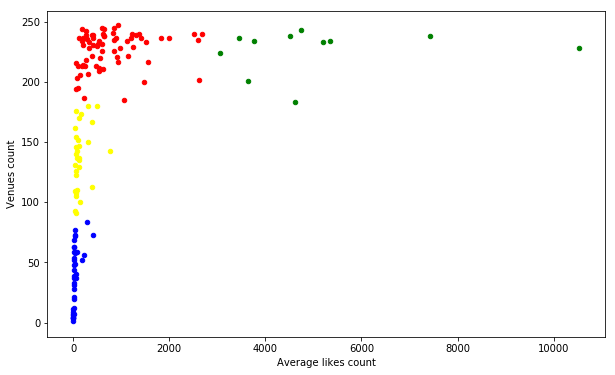

In [71]:
ax0 = cities_popularity_df[cities_popularity_df["Cluster"]==0].plot(kind='scatter', x='Average likes count', y='Venues count', figsize=(10, 6), color='red')
cities_popularity_df[cities_popularity_df["Cluster"]==1].plot(ax=ax0, kind='scatter', x='Average likes count', y='Venues count', figsize=(10, 6), color='blue')
cities_popularity_df[cities_popularity_df["Cluster"]==2].plot(ax=ax0, kind='scatter', x='Average likes count', y='Venues count', figsize=(10, 6), color='green')
cities_popularity_df[cities_popularity_df["Cluster"]==3].plot(ax=ax0, kind='scatter', x='Average likes count', y='Venues count', figsize=(10, 6), color='yellow')

In [77]:
# explore the 2 top interesting clusters (green=2 and red=0)
cities_popularity_df[cities_popularity_df["Cluster"]==2][["City", "Country", "Venues count", "Average likes count"]]

,City,Country,Venues count,Average likes count
7,Madrid,Spain,237,3447.6
8,London,United Kingdom,234,5356.0
16,Mexico City,Mexico,233,5203.5
18,Moscow,Russia,183,4623.2
21,Bangkok,Thailand,224,3065.3
35,Saint Petersburg,Russia,201,3644.4
36,Istanbul,Turkey,228,10533.4
41,New York,United States,238,7424.8
56,Paris,France,243,4747.9
61,Rome,Italy,238,4518.3


In [76]:
cities_popularity_df[cities_popularity_df["Cluster"]==0]

,Cluster,City,Country,Latitude,Longitude,Population,Venues count,Average likes count
2,0,Santiago,Chile,-33.446,-70.659,4658687,222,1146.8
3,0,Beijing,China,39.917,116.407,17912405,207,300.3
4,0,Bogota,Colombia,4.628,-74.077,7033914,220,560.3
5,0,Berlin,Germany,52.518,13.406,3501872,237,2002.1
9,0,Athens,Greece,37.984,23.728,3187734,233,1521.7
11,0,Jakarta,Indonesia,-6.175,106.827,9607787,234,1121.4
13,0,Tokyo,Japan,35.683,139.809,13161751,237,212.1
15,0,Seoul,South Korea,37.537,126.970,10406063,245,591.1
17,0,Lima,Peru,-12.082,-77.045,7509913,226,606.1
20,0,Singapore,Singapore,1.311,103.843,3378300,229,1242.1
